# Machine Learning Coursework 2 - Student Number 200546665_CW2


## 1. Classifiers [7 marks total]


In [1]:
# import datasets
from sklearn import datasets 

# load data
iris = datasets.load_iris() # load data 
#print(iris.DESCR) # print dataset description


In [2]:
# Dataset pre-processing 

import pandas as pd
import numpy as np

# Adding the iris dataset into a dataframe
iris_dataset = pd.DataFrame(iris.data, columns = iris.feature_names)

# Adding the target column to my newly created dataset
iris_dataset['target'] = iris.target
iris_dataset

# Placing dataset (first 4 columns) and target (last column) in X and y respectively 
X = iris_dataset.iloc[:,0:4].values
y = iris_dataset.iloc[:,4].values


### 1.1 Naïve Bayes Classifier [2]



In [3]:
#Write your code here      

# Importing the necessary libraries
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Splitting the dataset and the target in train and test datasets, for X and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state = 10)

# Creating a Gaussian Naive Bayes classifier and training it on the data
NB = GaussianNB()
NB.fit(X_train,y_train)

# Predicting on the test data
y_pred_NB = NB.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 1.2 Random Forest Classifier [3]



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

importance 	 feature name
0.46 		 feature 2
0.423 		 feature 3
0.097 		 feature 0
0.02 		 feature 1


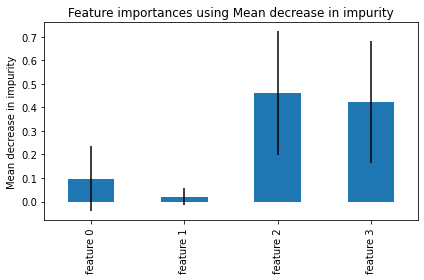

In [4]:
#Write your code here

# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a random forest classifier and training it on the data
RF = RandomForestClassifier(n_estimators=100, random_state=10)
RF.fit(X_train, y_train)

# Predicting on the test data
y_pred_RF = RF.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_RF))

# Evaluating feature performance of the model:

# Getting the features names
feature_names = [f"feature {i}" for i in range(X.shape[1])]

# Getting the features importances
importances = RF.feature_importances_

# Printing out an ordered list of feature importances
# First, Getting our features and weights
feature_importance = sorted( zip(importances, feature_names), reverse=True)
# Printing
print('importance \t feature name')
print("\n".join(['{} \t\t {}'.format(round(i,3),f) for i,f in feature_importance]))

# Visualising the feature importances:

# First putting the importances into and ndarray
forest_importances = pd.Series(importances, index=feature_names)

# Getting the standard deviation of accumulation of the impurity decrease within each tree
Standard_Deviation = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

# Plotting the feature importances
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=Standard_Deviation, ax=ax)
ax.set_title("Feature importances using Mean decrease in impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



### 1.3 kNN Classifier [2]


In [5]:
#Write your code here

# Importing the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Creating a kNN classifier, with 1 neighbour and training it on the data
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)

# Predicting on the test data
y_pred_KNN = KNN.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_KNN))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## 2 Code Report [6 marks total]


#Write your answer here

Firstly, to make the dataset ready for the machine learning models, I convert the iris dataset (with the 4 feature names) into a dataframe and then append the column target at the end of it. The next step will be to make sure the dataset with the first 4 feature columns is placed in object X, while the column target is placed in object y. I then use the train_test_split tool, from the sklearn model selection package, to split the dataset and the target into train and test datasets. The test size is selected at 20% and the random state is fixed at 10 (this simply sets a seed to the random generator).

For the Naïve Bayes Classifiers, the Gaussian Naïve Bayes (GaussianNB) package is imported from the sklearn naïve bayes package. This is a variant of Naive Bayes that follows Gaussian normal distribution; I chose this model because it is appropriate for continuous data. The model is first trained into the train dataset (X_train) and into the train target (y_train); then it is predicted on the test data. The evaluation of the model is done using the package metrics imported from the sklearn metrics library, where the test target is evaluated against the predictions.

For the Random Forest Classifier, the RandomForestClassifier model is first imported. Random forest uses decision trees as its base predictor and also uses bagging; it is suitable to solve both regression and classification problems.
In my code, the n_estimators is set at a default of 100, which indicates the number of decision trees that will be used in the random forest. Again, the model is first trained, then predicted on the test data and finally evaluated.
To evaluate the feature performance of the model, I first get all of the features' names, then fit the random forest model into the feature importances which are provided by the fitted attribute feature_importances_. This, is calculated as the mean and standard deviation of accumulation of the impurity decrease within each tree.
I then print the ordered list of feature importances, to review which are the most important.
Finally, I visualise the feature importances in a bar graph. First, I transfer the feature importances into a numpy array and then I calculate the standard deviation of accumulation of the impurity decrease within each tree. I use matplotlib to plot the impurity-based importance, with the feature on the x axis and the mean decrease in impurity on the y axis.

For the KNN Classifier, the KNeighborsClassifier package is imported and the number of neighbours is set at 1. 
KNN is an algorithm suitable for both regression and classification tasks and it essentially forms a majority vote between the K most similar instances to a given “unseen” observation. A new observation is classified by a majority vote of its neighbors, with the observation being assigned to the class most common amongst its K nearest neighbors, measured by a distance function.
Again, the model is then trained, predicted and evaluated.




## 3 Model Questions [14 marks total]


### 3.1 Naïves Bayes Questions [4]

#Write your answer here

1- Let's start by defining what the zero probabilities issue in a Naive Bayes model is. The zero probabilities issue in a Naïve Bayes model occurs when an instance in the test data set has a category that was not present during training: the model will then assign it “0” probability and will not be able to make a prediction. 
In other words, if an individual class label is missing, then the frequency-based probability estimate will be zero. 
This issue raises issues because it impacts the output when all the likelihoods are multiplied (the output will be zero) causing the whole performance of the classification to be skewed and the model to be less accurate.


2- We can avoid the problem of zero probabilities by simply adding number “1” to the count for every feature value-class combination when a feature value doesn’t occur with every class value.
We are basically increasing the count of the variable with zero to a small value (usually 1) in the numerator, so that the overall probability doesn’t become zero.
This will lead to the removal of all the zero values from the classes and, at the same time, will not impact the overall relative frequency of the classes.

For example, let’s suppose the training data looks like this:

|               | Setosa  | Versicolour  | Virginica  |
|---------------|---------|--------------|------------|
| Sepal length  | 10      | 5            | 8          |
| Sepal width   | 0       | 0            | 0          |
|               |         |              |            |

P(Sepal = length | Setosa) = 10/10 =1

P(Sepal = width | Setosa) = 0/10 =0


To fix the “0”, we should add one to every value in this table when calculating the probabilities:

|               | Setosa  | Versicolour  | Virginica  |
|---------------|---------|--------------|------------|
| Sepal length  | 11      | 6            | 9          |
| Sepal width   | 1       | 1            | 1          |
|               |         |              |            |

P(Sepal = length | Setosa) = 11/12 = 0.92

P(Sepal = width | Setosa) = 1/12 = 0.08

As we can see by the results, the zero probability has been resolved.

Additionally, this is how I will avoid the problem with a pseudocode:
- Defining the probability of each of the classes.
- We end up with probabilities, where an element is the probability of feature f having value v, given the class c.
- For every probability where we have counts of zero in the numerator, we add an alpha parameter or smoothing parameter which is ≠ 0: this will solve the problem of zero probabilities in our Naïve Bayes model.
- We use the probabilities calculated above to compute the model.

### 3.2 Random Forest Questions [6]


#Write your answer here

1- With an importance (or a mean decrease in impurity) calculated at 0.46, the most important feature from my random forest classifier, is feature 2: "petal length" (as also shown in the sorted feature importance table and visualized in the bar graph, coded above). See below a comprehensive summary:

| Importance  |  Feature name              |   |
|-------------|----------------------------|---|
| 0.46        |  feature 2 > petal length  |   |
| 0.423       |  feature 3 > petal width   |   |
| 0.097       |  feature 0 > sepal length  |   |
| 0.02        |  feature 1 > sepal width   |   |




2- Starting from the fact that with all 4 features included in my random forest classifier, the accuracy (and all the other metrics) are calculated as a perfect 1.00, to increase accuracy of the model (or, more specifically, in this case, to maintain the same level of perfect accuracy) both the features with less importance "sepal length" & "sepal width" can be removed.

The code below, shows the changes in the evaluation metrics when:

a) the feature "sepal width" is removed from the dataset;

b) the feature "sepal length" is removed from the dataset;

c) both the features "sepal width" & "sepal length" are removed from the dataset.

As outlined in the code below, for each, newly formed detaset, I first split the dataset into new train and test sets, then train the random forest classifier, predict and finally evaluate the new model.








In [6]:
# a)
# Removing feature/column "sepal width" from the dataset
X_1 = iris_dataset[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
X_1

# Splitting the new dataset and the target in train and test datasets, for X_1 and y
X_train, X_test, y_train, y_test = train_test_split(X_1,y,test_size = .20, random_state = 10)

# Creating a random forest classifier and training it on the data
RF_1 = RandomForestClassifier(n_estimators=100, random_state=10)
RF_1.fit(X_train, y_train)

# Predicting on the test data
y_pred_RF_1= RF_1.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_RF_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [7]:
# b)
# Removing feature/column "sepal length" from the dataset

X_2 = iris_dataset[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X_2

# Splitting the new dataset and the target in train and test datasets, for X_2 and y
X_train, X_test, y_train, y_test = train_test_split(X_2,y,test_size = .20, random_state = 10)

# Creating a random forest classifier and training it on the data
RF_2 = RandomForestClassifier(n_estimators=100, random_state=10)
RF_2.fit(X_train, y_train)

# Predicting on the test data
y_pred_RF_2 = RF_2.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_RF_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [8]:
# c)
# Removing both columns "sepal width" & "sepal length"

X_3 = iris_dataset[['petal length (cm)', 'petal width (cm)']]
X_3

# Splitting the new dataset and the target in train and test datasets, for X_3 and y
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size = .20, random_state = 10)

# Creating a random forest classifier and training it on the data
RF_3 = RandomForestClassifier(n_estimators=100, random_state=10)
RF_3.fit(X_train, y_train)

# Predicting on the test data
y_pred_RF_3 = RF_3.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_RF_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



To summarize the evaluation results for each of the newly formed datasets (with focus on the model accuracy), the below table has been created.


|                                                      | Model Accuracy |   |
|------------------------------------------------------|----------|---|
| All 4 features included                              | 1.00     |   |
| Without feature "sepal width"                        | 0.97     |   |
| Without feature "sepal length"                       | 0.97     |   |
| Without both features "sepal length" & "sepal width" | 1.00     |   |

As we can see, removing EITHER feature "sepal width" OR feature "sepal length" actually decrease the accuracy of the model!
While removing BOTH these low importance features increase and mantains the accuracy (and all the other metrics) at a perfect score 1.00.



3- It would be useful to remove these features because, overall, the more trustworthy the computed importances are, the more accurate the model is.
Leaving less important features in the dataset may cause issues in terms of model performance.
As we know, random forests consist of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset so that similar response values end up in the same set. Impurity is the measure based on which the local optimal condition is chosen. So, when training a tree, it can be computed how much each feature decreases the weighted impurity in a tree: you want to select only the important features which optimize the decrease of impurity so that when each individual tree is trained on a random subset of the features and when trees are combined, there is little correlation between them, reducing the risk of over-fitting and the risk of building dependencies between trees.




### 3.3 kNN Questions [4]


#Write your answer here

1- I think the iris dataset is well suited to the kNN classifier.
As we know, the kNN algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in many industries.
KNN performs better with a lower number of features and it proves to be very sensitive to the scale of the dataset as it can be influenced negatively by irrelevant features.
We can say that when the number of features increases then more data is required, leading towards an increase in dimension which can consequently lead to the problem of overfitting.
The Iris Flower Dataset is a dataset made of 150 observations under 5 features: Petal Length, Petal Width, Sepal Length, Sepal width and Class (or Species). There are 3 classes, making this a multiclass classification problem as it involves predicting the flower species, given measurements of iris flowers.
The Iris dataset appears to be suited to KNN, because it is a clean and fairly small classification dataset, with the three classes (setosa, virginica, and versicolor) being perfectly balanced. 
The features are only 4 and are all continuous, which also makes measuring the Euclidean distances in the kNN and calculating the accuracy much simpler. 


2- The ideal dataset will have 2 or more classes, making it a binary or multiclass classification problem.
The dataset would be fairly small with lower dimensionality (not more than 5 features, < 200 observations) display no missing data, balanced and contain only continuous observations.
Ideally, we want features which are more relevant to the class and less relevant to other features (minimum correlation).
Since kNN calculates the Euclidean distance between points to determine the nearest neighbouring points, it is important that all of the data is also on the same scale. 
This could be achieved by normalizing the dataset, for example, in range 0-1. Not only this is useful when calculating the distance measures, as kNN uses also feature values, when one feature values is larger than the others, that feature can dominate the distance and affect the outcome of the KNN, so normalizing the dataset becomes really important.


## 4 Comparing Models [18 marks total]


### 4.1 Compare each model [3]


#Write your answer here

The main differences I see between the 3 classifiers is in regards to the evaluation metrics: for all 4 features, while both the Naïve Bayes and the Random Forest Classifier score perfect accuracy, precision, recall and f1-score of 1.00 for all classes, the KNN scores 1.00 in precision, recall and f1-score for class 0, but only 0.92 and 0.96 in recall and f1-score for class 1 and only 0.88 in precision and 0.93 in f1-score for class 2.
An accuracy of 0.97 makes this model the less accurate of the three.
More specifically, only 88% of precision (which is the ability of the classifier not to label an instance positive that is actually negative) means that only 88% of predictions were correct for class 2.
The recall (which explains what percent of the positive cases were actually caught) shows that 92% positive instances were found for class 1.
Finally, the f1-score (which shows what percent of positive predictions were correct) is 96% for class 1 and 93% for class 2.

These results show that the Naïve Bayes and Random Forest Classifiers are best suited for this dataset, compared to the kNN classifier.



### 4.2 Accuracy [6]


#Write your answer here

Both the Naïve Bayes and the Random Forest Classifier score perfect accuracy of 1.00, While the kNN classifier scores 0.97 in accuracy making it the less accurate model of the three.
The kNN classifier and the relative accuracy, could be affected by the fact that the dataset is not normalized so the features with biggest Euclidean distance, may influence the performance of the model. 
Alternatively, it could be the case that some features are irrelevant and affect the performance of the model negatively.

I want to test both these 2 hypotheses.

1-	In the code below, I have used the MinMaxScaler from Sci-Kit Learn to scale the dataset from 0 to 1. I have then split the dataset and applied the kNN classifier on the new dataset, keeping the number of neighbours at 1.


In [9]:
# Scaling the iris dataset

# Importing the necessary library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Adding the iris dataset into a dataframe
iris_dataset = pd.DataFrame(iris.data, columns = iris.feature_names)

# Scaling the first 4 features columns of the iris dataset
iris_scaled = pd.DataFrame(scaler.fit_transform(iris_dataset), columns=iris_dataset.columns)
iris_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [10]:
# Placing the scaled dataset and the target in X and y respectively 
X = iris_scaled
y = iris.target

# Splitting the dataset and the target in train and test datasets, for X and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state = 10)

# Creating a kNN classifier, with 1 neighbour and training it on the data
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)

# Predicting on the test data
y_pred_KNN = KNN.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_KNN))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Scaling the dataset, does not improve the performance of the kNN model. The results in the evaluation and the accuracy are the same as in with the non-scaled dataset.

Let's try the second hypothesis now: removing the less important features.

2- I will be removing the previously calculated less important features.
In more detail, in the code below I have:

a) removed the feature "sepal width" from the dataset & re-trained the kNN classifier, predicted and evaluated the model;

b) removed the feature "sepal length" from the dataset & re-trained the kNN classifier, predicted and evaluated the model;

c) removed both the features "sepal width" & "sepal length" from the dataset & re-trained the kNN classifier, predicted and evaluated the model.





In [11]:
# a)
# Removing feature/column "sepal width" from the dataset
X_1 = iris_dataset[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
X_1

# Splitting the new dataset and the target in train and test datasets, for X_1 and y
X_train, X_test, y_train, y_test = train_test_split(X_1,y,test_size = .20, random_state = 10)

# Creating a kNN classifier, with 1 neighbour and training it on the data
KNN_1 = KNeighborsClassifier(n_neighbors=1)
KNN_1.fit(X_train,y_train)

# Predicting on the test data
y_pred_KNN_1 = KNN_1.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_KNN_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [12]:
# b)
# Removing feature/column "sepal length" from the dataset
X_2 = iris_dataset[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X_2

# Splitting the new dataset and the target in train and test datasets, for X_2 and y
X_train, X_test, y_train, y_test = train_test_split(X_2,y,test_size = .20, random_state = 10)

# Creating a kNN classifier, with 1 neighbour and training it on the data
KNN_2 = KNeighborsClassifier(n_neighbors=1)
KNN_2.fit(X_train,y_train)

# Predicting on the test data
y_pred_KNN_2 = KNN_2.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_KNN_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
# c)
# Removing both features/columns "sepal width" & "sepal length"
X_3 = iris_dataset[['petal length (cm)', 'petal width (cm)']]
X_3

# Splitting the new dataset and the target in train and test datasets, for X_3 and y
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size = .20, random_state = 10)

# Creating a kNN classifier, with 1 neighbour and training it on the data
KNN_3 = KNeighborsClassifier(n_neighbors=1)
KNN_3.fit(X_train,y_train)

# Predicting on the test data
y_pred_KNN_3 = KNN_3.predict(X_test)

# Evaluating the model
print(metrics.classification_report(y_test, y_pred_KNN_3))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Removing the second less important feature "sepal length" from the dataset, improves the performance of the model, gaining a perfect accuracy score of 1.00.

While, removing all other features cause no changes to the performance of the model: the accuracy and the other evaluation metrics remain unchanged.


### 4.3 Appropriate Use [9]


#Write your answer here

- The Naïve Bayes Classifier is appropriate to use with text classification problems that include a high-dimensional training dataset.
This algorithm is popular for multi-class predictions as well. Some popular real-world examples of Naïve Bayes Algorithm use are spam filtration, sentimental analysis (which refers to the identification of positive or negative sentiments of a target group) or articles classification.
In the case study of spam detection with Naive Bayes by Fernando, L. (2022), on a dataset of 4327 emails, a naive bayes classifier is used to classify a given email as spam or ham depending on its content.
Overall, using a total of 170 Features the classifier achieves a success rate of about 94.80% being able to correctly categorize spam emails 95/100 times.
Naïve Bayes Classifier is an appropriate model for this use-case, because the dataset is a text (non-numeric) and it is quite high in dimensionality. This is a binary classification problem, where this algorithm performs pretty well.


- Random Forest Classifier is appropriate to use for both classification and regression tasks.
It can handle a large proportion of data with higher dimensionality, while maintaining the accuracy and managing missing values.
The more random the forest training in terms of bootstrapping training data, and the more random the feature selection is, the better the algorithm will perform. 
Random forests are computationally advantageous because of bagging: they allow each classifier to operate in parallel; and because they're based on the fast decision tree algorithm.
There are many real-world situations in which Random Forest can be used. A few examples are: the banking industry for credit card fraud detection, in the healthcare and medicine for breast cancer prediction or in the stock market for bitcoin price detection or even in the e-commerce for product recommendation.
In more detail, let’s analyse the credit card fraud detection example. In this project by MansiMeena (2013), Random Forest was used to identify fraud in European credit card transactions. The dataset used, is hosted on Kaggle and is made up of transactions made in September 2013. The dataset contains 284,807 transactions that occurred over a two-day period. Of these, 492 (0.17%) are indeed fraudulent. Each transaction has 30, all numerical, features.
Random Forest is an appropriate model for this use-case, because this a binary classification problem where the dataset is particularly large and with very high dimensionality. In the project, it was possible to accurately identify fraudulent transactions: on a 20% test set, the predictions from the random forest model had an F1 score of 0.869: a better result compared to other models!



- kNN Classifier can be used for both classification and regression predictive problems, however, is more appropriate to use for classification tasks. 
kNN is most useful with labelled data and it can achieve high accuracy in a wide variety of prediction-type problems. It’s also used in many other different areas, such as image and video recognition, handwriting detection, but also to search semantically similar documents.
This specific study from Musa, O., Malik, A., Buna, I., Lasena, M., Rizal Isnanto, R. and Suryono, S. (2018) focuses on the application of the K-Nearest Neighbour algorithm in the expert system for diagnosing lung disease, according to its type.
The dataset comprises of 12 types of lung disease and 133 observations and the results of the predictions carried out by the kNN, produce a high accuracy of 96.97% and thus making it able to detect accurately lung disease. 
kNN is an appropriate model for this use-case, because it is a classification problem with labelled data (type of lung diseases) .
The dataset is also fairly small with lower dimensionality making kNN the most suitable algorithm.






### REFERENCES:

 - Tiwari, M. (2020). Iris Data set Analysis using KNN - Analytics Vidhya - Medium. [online] Medium. Available at: https://medium.com/analytics-vidhya/iris-data-set-analysis-using-knn-bfea147423ee [Accessed 13 Feb. 2022].
 
- scikit-learn. (2021). Feature importances with a forest of trees. [online] Available at: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html [Accessed 13 Feb. 2022].


- London.ac.uk. (2021). Course: Machine learning (DSM040-2021-OCT), Topic: Solutions to Jupyter Notebooks. [online] Available at: https://learn.london.ac.uk/course/view.php?id=585§ion=15 [Accessed 13 Feb. 2022].


- Fernando, L. (2022). Case Study: Spam Detection With Naive Bayes. [online] Github.io. Available at: https://ljfernando.github.io/SpamDetectionNaiveBayes/ [Accessed 20 Feb. 2022].


- Meena, M. (2020). Applications of Random Forest. [online] OpenGenus IQ: Computing Expertise & Legacy. Available at: https://iq.opengenus.org/applications-of-random-forest/ [Accessed 20 Feb. 2022].


- MansiMeena (2013). GitHub - MansiMeena/Credit-Card-Fraud-Detection. [online] GitHub. Available at: https://github.com/MansiMeena/Credit-Card-Fraud-Detection [Accessed 4 Mar. 2022].


- Musa, O., Malik, A., Buna, I., Lasena, M., Rizal Isnanto, R. and Suryono, S. (2018). Application Of K-Nearest Neighbor (K-NN) Algorithm On Lung Disease Diagnosis Expert System. International Journal of Scientific & Engineering Research, [online] 9. Available at: https://www.ijser.org/researchpaper/Application-Of-K-Nearest-Neighbor-K-NN-Algorithm-On-Lung-Disease-Diagnosis-Expert-System.pdf.


- Fernando, L. (2022). Case Study: Spam Detection With Naive Bayes. [online] Github.io. Available at: https://ljfernando.github.io/SpamDetectionNaiveBayes/ [Accessed 4 Mar. 2022]











